In [1]:
# Run the top two cells in this notebook first, every time you reopen your notebook.
%load_ext autoreload
%autoreload 2

In [35]:
%matplotlib inline
# Some imports that may be helpful in later cells
import numpy as np
import matplotlib.pyplot as plt
import animal_guessing_game as game
import random 
import pandas as pd
import seaborn as sns

### Animal Guessing Game

In the first few parts of this problem you'll be playing a guessing game. The computer chooses an animal at random, and your goal is to guess which animal has been chosen. You will first be shown two features of the animal and asked to make a guess. If you guess incorrectly, more features will be shown and you'll get more chances to guess the animal. Your score is the total number of tries it takes you to guess the animal. 

<div class="alert alert-success">Play five iterations of the guessing game by uncommenting and running the cell below; your results will be saved in the data folder to allow you to analyze them later. You should also submit this file when you upload your assignment. (Note: Some of these features are rather odd - do your best).
<p><p>
After running the whole game and checking that your data file is saved in the data folder, you may want to comment out this cell so that you can use "Run All" to run all subsequent cells and not have to play the game each time.</div>

In [3]:
trials = game.play_game("data/classes.txt","data/predicates.txt", "data/predicate-matrix-binary.txt")

<div class="alert alert-success">Briefly, describe your experience playing the game. Did it become more difficult with more animals? Do you feel like this difficulty scaled linearly (i.e., was it twice as hard to play with twice as many animals, or was it less than twice as hard, or more than twice as hard)?</div>

### Modeling the Animal Guessing Game: Rule-based categories

<div class="alert alert-success">Let's try to model the inferences made by players of this game using a simple program. Your model should play the game by looking at the given choices (animals) and observations (features) and ruling out possible hypotheses. Specifically, write a function <tt>guess(animal_choices, animal_features, animal_names, feature_names, feature_matrix)</tt>, where <tt>animal_choices</tt> and <tt>animal_features</tt> are the possibilities for the animal and the features that have been given to the model so far (animal_names, feature_names, and feature_matrix are the lists representing the data loaded from the text files) in <tt>animal_guessing_game.py</tt> which chooses uniformly at random one of the choices that matches all of the listed features. Uniformly at random means that all animals in <tt>animal_choices</tt> that have the listed features should be equally likely to be chosen.
<p>
In the cell below, test your <tt>guess</tt> function to make sure it behaves correctly.</div>

In [4]:
animal_names = game.load_name_data("data/classes.txt")
feature_names = game.load_name_data("data/predicates.txt")
feature_matrix = game.load_animal_feature_data("data/predicate-matrix-binary.txt")

def guess(animal_choices, animal_features, animal_names, feature_names, feature_matrix):
    animal_inds = [animal_names.index(anim) for anim in animal_choices] #find indecies for animals
    feature_inds = [feature_names.index(feat) for feat in animal_features] #find indecies for features
    guesses = [] 
    for a in animal_inds: #find all animals that have all features
         if all([feature_matrix[a][f] ==1 for f in feature_inds]): #if the animal has all of the features
                guesses.append(animal_names[a])
    return random.choice(guesses) #pick an animal at random that has all of the features


In [5]:
animal_choices = ['rat', 'skunk', 'walrus', 'cow', 'siamese cat', 'bat', 'fox', 'rabbit', 'lion']
animal_features = ['paws', 'smart']
guess(animal_choices, animal_features, animal_names, feature_names, feature_matrix)

'fox'

<div class="alert alert-success">Now, write a function <tt>model</tt> that will have your computer play 500 iterations of each of the five hypothesis sizes (2, 4, 8, 16, and 32). This function takes no parameters. You'll likely want to make a function like <tt>human_query</tt> for the computer model - e.g., <tt>computer_query</tt>. If you do this, you can use the <tt>run</tt> function that I've written to take care of much of the running of the game. One problem that may arise is what to pass in for stream, as you don't really want to print out all 500*5 games that the computer plays. Instead, you can omit writing out these games by opening a stream like this:
<br>
<tt>stream = open(os.devnull, 'w')</tt>
</br>

Pass this stream to the run function, and you won't see any output.
<p>
<tt>model</tt> does not need to return anything, but it should write out a data file with the model results to "data/model_trial_data.txt". This file should have 500 lines, each with 5 comma-separated numbers that correspond to the number of guesses for each hypothesis size. You're welcome to use the <tt>save_trial_data</tt> function that I wrote to help.
<p><p>
In the cell below, call your <tt>model</tt> function so that it runs and saves the data.
<div>

In [19]:
def setUpGame(h_size, animal_names, feature_names, feature_matrix):
    feature_names = np.array(feature_names)
    animals = random.sample(animal_names, h_size)
    answer = animals[0] #first animal is the answer
    f_indexes = np.array([f == 1 for f in feature_matrix[animal_names.index(answer)]])
    features = feature_names[f_indexes]
    return(animals, features)

def runGame(h_size, animal_names, feature_names, feature_matrix):
    results = []
    for trial in range(500):
        animals, features = setUpGame(h_size, animal_names, feature_names, feature_matrix)
        #features = features.shuffle() #to make it random
        g = "wrong"
        tries = 0
        correct = animals[0]
        while g != correct: #loop until correct
            ### 
            # To save time in computation, we will filter the animals so that animals
            # filtered in a previus feature list are still filtered out
            ##
            animal_inds = [animal_names.index(anim) for anim in animals] #find indicies for animals
            feature_inds = [feature_names.index(feat) for feat in features[:2+tries]] #find indicies for features (based on number of trials)
            valid = []
            for a in animal_inds: #find all animals that have all features
                 if all([feature_matrix[a][f] ==1 for f in feature_inds]): #if the animal has all of the features
                    valid.append(animal_names[a])
            animals = valid
            
            #guess randomly
            g = random.sample(animals,1)[0]
            animals.remove(g) #don't guess the same animal twice 
            tries +=1
            
        results.append(tries)
    return(results)
    
def model():
    animal_names = game.load_name_data("data/classes.txt")
    feature_names = game.load_name_data("data/predicates.txt")
    feature_matrix = game.load_animal_feature_data("data/predicate-matrix-binary.txt")
    two = runGame(2, animal_names, feature_names, feature_matrix)
    four = runGame(4, animal_names, feature_names, feature_matrix)
    eight = runGame(8, animal_names, feature_names, feature_matrix)
    sixteen = runGame(16, animal_names, feature_names, feature_matrix)
    thirtytwo = runGame(32, animal_names, feature_names, feature_matrix)
    results = []
    for i in range(500):
        row = [two[i],four[i],eight[i],sixteen[i],thirtytwo[i]]
        results.append(row)
    game.save_trial_data(results, 'data/model_trial_data.txt')       
    
model()

### Modeling the Animal Guessing-Game: Knowledgeless Play

<div class="alert alert-success">The model above assumes the player knows all the animal-feature pairings. Imagine instead that the player knows only a subset of the feature pairings. We'll model this by assuming that we have a new player for each set of hypothesis sizes, and that player knows about <tt>n</tt> of the 85 features, where <tt>n</tt> is a parameter of the model. <tt>n</tt> random features are chosen, and when the model makes its guesses, it chooses a guess uniformly at random from those options that are consistent with the observed features that it knows about. If it doesn't know about an observed feature, it just ignores it. For example, if the model knows only about "small", and the observed features are "small" and "strainteeth", the model will choose an animal from the available choices that are small. Write a function <tt>bounded_model</tt> that takes in the argument <tt>n</tt> and plays 500 iterations of each of the 5 hypothesis sizes. It should write it's results to a file name "data/bounded_model_trial_data_n.txt", where the <tt>n</tt> is replaced by the value of the parameter <tt>n</tt>. Note that you can likely use a similar structure to the previous part - look at what parameters are taken in by the <tt>human_query</tt> function.
<p>
<p>
In the cell below, run your model with n = 5 and then with n = 20.
<div>

In [30]:
def runGame_n(n, h_size, animal_names, feature_names, feature_matrix):
    results = []
    for trial in range(500):
        animals, features = setUpGame(h_size, animal_names, feature_names, feature_matrix)
        
        
        #Filter features down to just the ones it knows
        knownFeatures = random.sample(feature_names,n)
        features = list(filter(lambda x: x in knownFeatures, features))
        
        
        g = "wrong"
        tries = 0
        correct = animals[0]
        while g != correct: #loop until correct
            ### 
            # To save time in computation, we will filter the animals so that animals
            # filtered in a previus feature list are still filtered out
            ##
            animal_inds = [animal_names.index(anim) for anim in animals] #find indicies for animals
            feature_inds = [feature_names.index(feat) for feat in features[:2+tries]] #find indicies for features (based on number of trials)
            valid = []
            for a in animal_inds: #find all animals that have all features
                 if all([feature_matrix[a][f] ==1 for f in feature_inds]): #if the animal has all of the features
                    valid.append(animal_names[a])
            animals = valid
            
            #guess randomly
            g = random.sample(animals,1)[0]
            animals.remove(g) #don't guess the same animal twice 
            tries +=1
            
        results.append(tries)
    return(results)
    
def model_n(n):
    animal_names = game.load_name_data("data/classes.txt")
    feature_names = game.load_name_data("data/predicates.txt")
    feature_matrix = game.load_animal_feature_data("data/predicate-matrix-binary.txt")
    two = runGame_n(n,2, animal_names, feature_names, feature_matrix)
    four = runGame_n(n,4, animal_names, feature_names, feature_matrix)
    eight = runGame_n(n,8, animal_names, feature_names, feature_matrix)
    sixteen = runGame_n(n,16, animal_names, feature_names, feature_matrix)
    thirtytwo = runGame_n(n,32, animal_names, feature_names, feature_matrix)
    results = []
    for i in range(500):
        row = [two[i],four[i],eight[i],sixteen[i],thirtytwo[i]]
        results.append(row)
    game.save_trial_data(results, 'data/model_trial_data_{}.txt'.format(n))       
    
model_n(5)
model_n(20)

### Analyzing the Results

<div class="alert alert-success">In the cell below, write code to graph the trial data for each of your models as well as trial data that I've included from 294 people who played this game previously (stored in "data/old_trial_data.txt"). Make a line graph with separate lines for each model and for the people, where the x-axis represents the size of the hypothesis set and the y-axis represents the number of guesses. Plot the average across trials - e.g., while 294 people played the game, you'll have just one line for people and the y-value for hypothesis size 2 will the be average number of guesses people required when they had a hypothesis set of size 2. As for all graphs, please make sure your graph is appropriately labeled.

</div>

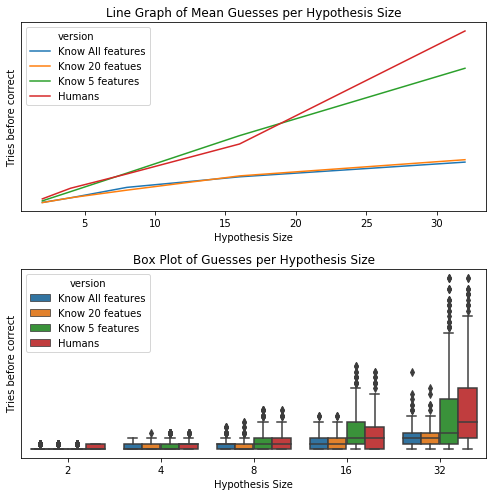

In [107]:
def getResults(filename):
    trials = []
    f = open(filename)
    for line in f:
        row = [int(x) for x in line.strip().split(',')]
        trials.append(row)
    f.close()
    return(trials)

model_base = pd.read_csv('data/model_trial_data.txt',names = ['2','4','8','16','32'])
model_5 = pd.read_csv('data/model_trial_data_5.txt',names = ['2','4','8','16','32'])
model_20 = pd.read_csv('data/model_trial_data_20.txt',names = ['2','4','8','16','32'])
humans = pd.read_csv('data/old_trial_data.txt',names = ['2','4','8','16','32'])
model_base['version']='Know All features'
model_5['version']='Know 5 features'
model_20['version']='Know 20 featues'
humans['version']='Humans'
allModels = model_base.append(model_20).append(model_5).append(humans).reset_index(drop=True)
melted = allModels.melt(id_vars=['version'],var_name='Hypothesis Size', value_name = "Tries before correct")
melted['Hypothesis Size'] = pd.to_numeric(melted['Hypothesis Size'])


f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=False)
sns.lineplot(x="Hypothesis Size",y="Tries before correct",hue="version",data=melted, err_style=None, ax=axes[0]).set_title("Line Graph of Mean Guesses per Hypothesis Size")
sns.boxplot(x="Hypothesis Size",y="Tries before correct",hue="version",data=melted, ax=axes[1]).set_title("Box Plot of Guesses per Hypothesis Size")
plt.setp(axes, yticks=[])
plt.tight_layout()

<div class="alert alert-success">How do the performances of the models compare to one another and to people? Are there systematic differences between each set of data for how the number of guesses scales with the number of animal choices? Explain your answers. Which model do you think provides the closest match to people? The furthest? For the model that is closest, explain whether you think this model is a good account of people's inductive inferences in this type of guessing games? For the model that is furthest, why do you think this model behaves differently from people? (I.e., what is missing in the model or what assumptions are incorrect that cause it to be a poor account of people's behavior?)
</div>

### Finding Rule-based Categories

(Definitions) One of the attractive features of the logical perspective on the world is that it seems to make categorization easy: we can just specify a definition of a category (e.g. "an even number is an integer that can be divided by 2 with no remainder") and check if something belongs to the category by checking if it satisfies the rule. In the next set of questions, you'll use the same dataset as in the previous parts to explore this idea.


<div class="alert alert-success">
In <tt>animal_guessing_game.py</tt>, write a function <tt>find_simplest_rule(target_animal, animal_names, features_names, feature_matrix)</tt> which takes as parameters an animal name, a list of animal names, a list of feature names, and a binary 2-dimensional list of animal-feature pairs (the feature matrix); as in previous parts, each inner list is one animal. This function should find the simplest conjunctive rule for identifying the given animal. A rule identifies an animal if it is true for the target animal and false for all other animals. The rule may include conjunctions of features or their negations. For example, the rule "lean and not strainteeth" would include all animals that have the feature lean and do not have the feature strainteeth. Your function should return a dictionary that has two keys: positive_features, where the value is a list of the names of features that are not negated; and negative_features, where the value is a list of the names of features that are negated. For example, the rule above would be represented by the following dictionary: <tt>{"positive_features" : ["lean"], "negative_features" : ["strainteeth"]}</tt>. The dictionary should return the simplest rule that identifies the target animal. The simplest rule is defined as the one that contains the fewest features (whether or not they are negated).
</div>

<div class="alert alert-success">
In the cell below, include some tests to make sure your function works. At the end, print out the best rule for identifying "elephant" if you give the function all possible features but only include the first 25 animals (that is, the length of animal_names should be 25 and the length of feature matrix should also be 25).
</div>

<div class="alert alert-success">
In the cell below, print out all animals in the full dataset of 50 animals that are consistent with the "elephant" rule you created above.
</div>

<div class="alert alert-success">
You may have found that your original rule did not work for the complete dataset, although you could use your function to find a new rule that does work for all 50 animals. If you were to refine your rule with the full dataset, do you think that the new rule would be consistent with all animals you might come in contact with in the world (both elephants and not)? Would continually refining your rule as you come into contact with more animals be an effective way to maintain a correct logical definition of each animal category? Explain your answers and discuss how you think this relates to whether logical definitions are a good model of categorization.
</div>


<div class="alert alert-success">
Assume people do maintain logical definitions of categories. Your function above finds the simplest rule for a particular animal. How does this run time of this function scale with the number of possible features and the number of possible animals? Do you think that the way this scales is a reasonable approximation for how people might form logical categories? Explain why or why not.
</div>